# From basic text processing to word cloud in python
### How to see through a word cloud without going blind

In [1]:
# Get story tale
story = open('fairy_ointment.txt', 'rt', encoding='utf-8')
story

<_io.TextIOWrapper name='fairy_ointment.txt' mode='rt' encoding='utf-8'>

In [2]:
# You can read the first 15th letters
story.read(15)

'FAIRY OINTMENT\n'

In [3]:
# Or you can read the next full line
story.readline()

'by Joseph Jacobs\n'

In [4]:
# Or the next
story.readline()

'\n'

In [5]:
# You can capitalize the letters of the following line
story.readline().upper()

'DAME GOODY WAS A NURSE THAT LOOKED AFTER SICK PEOPLE, AND MINDED BABIES.\n'

In [6]:
# Or do the opposite
story.readline().lower()

'one night she was woke up at midnight, and when she went downstairs,\n'

In [7]:
story.readline().split()

['she',
 'saw',
 'a',
 'strange',
 'squinny-eyed,',
 'little',
 'ugly',
 'old',
 'fellow,',
 'who',
 'asked',
 'her']

In [8]:
# This statment is for finish reading the text file
story.close()

In [9]:
# You can get the total of word in the story
with open('./data/fairy_ointment.txt', 'rt', encoding='utf-8') as story:
    fairy_ointment = story.read()
    fairy_ointment_words = fairy_ointment.split()

print('Number of words in the story :', len(fairy_ointment_words))

FileNotFoundError: [Errno 2] No such file or directory: './data/fairy_ointment.txt'

### Text processing using pandas

In [16]:
import pandas as pd

fairy_ointment_data = fairy_ointment.split("\n")
df_fairy_ointment_data = pd.DataFrame({'Lines':fairy_ointment_data})
df_fairy_ointment_data.head(10)

,Lines
0,FAIRY OINTMENT
1,by Joseph Jacobs
2,
3,Dame Goody was a nurse that looked after sick ...
4,"One night she was woke up at midnight, and whe..."
5,"she saw a strange squinny-eyed, little ugly ol..."
6,to come to his wife who was too ill to mind he...
7,"like the look of the old fellow, but business ..."
8,"on her things, and went down to him. And when ..."
9,whisked her up on to a large coal-black horse ...


In [17]:
# Because there are lines without alphanumeric character  you can delete them
df_fairy_ointment_data = df_fairy_ointment_data[df_fairy_ointment_data.Lines.str.contains(r"\w", regex=True)]
df_fairy_ointment_data

,Lines
0,FAIRY OINTMENT
1,by Joseph Jacobs
3,Dame Goody was a nurse that looked after sick ...
4,"One night she was woke up at midnight, and whe..."
5,"she saw a strange squinny-eyed, little ugly ol..."
...,...
72,“The ointment! The ointment!” cried the old pi...
73,meddling with what don't concern you: you shal...
74,"with that he struck her on her right eye, and ..."
75,"more; and, what was worse, she was blind on th..."


In [18]:
# You can get the number of word for each line
df_fairy_ointment_data.Lines.str.split().str.len()

0      2
1      3
3     13
4     13
5     12
      ..
72    12
73    13
74    15
75    14
76     7
Name: Lines, Length: 66, dtype: int64

In [19]:
# And then get the total of word in the story wich archive the same result that in previous steatments
print('Number of words in the story :',df_fairy_ointment_data.Lines.str.split().str.len().sum())

Number of words in the story : 809


### Counting most common words

In [20]:
# Using Counter you can find the most common words
from collections import Counter

text = '\n'.join(df_fairy_ointment_data.Lines.str.lower().values)

Counter(text.split()).most_common(20)

[('the', 41),
 ('and', 33),
 ('to', 29),
 ('she', 27),
 ('as', 17),
 ('a', 16),
 ('her', 16),
 ('was', 13),
 ('with', 12),
 ('dame', 10),
 ('of', 10),
 ('they', 10),
 ('goody', 9),
 ('old', 8),
 ('so', 8),
 ('see', 8),
 ('that', 7),
 ('in', 7),
 ('had', 7),
 ('at', 6)]

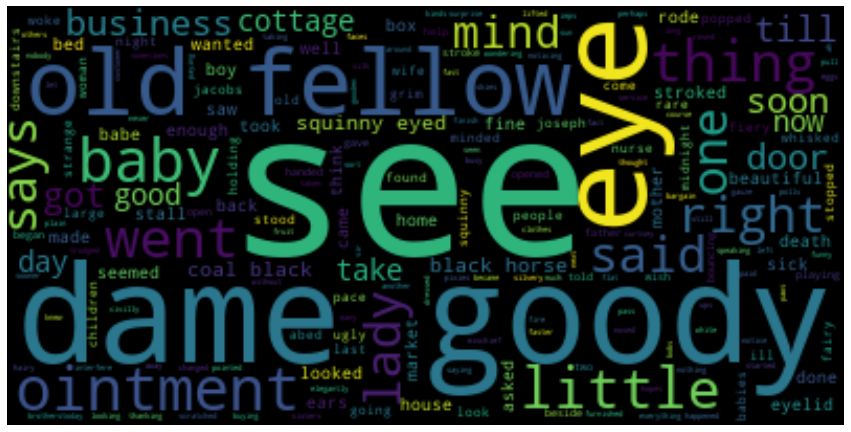

In [21]:
import wordcloud
import matplotlib.pyplot as plt

text = '\n'.join(df_fairy_ointment_data.Lines.str.lower().values)

# Generate wordcloud
wc = wordcloud.WordCloud().generate(text)

# Showing wordcloud
plt.figure(figsize=(15, 15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

The stop words or words without information are ignored for default, as prepositions and articles. But you can add another stop words

stop_words = nlp.Defaults.stop_words
another_stop_words = ['till']
stop_words.update(another_stop_words)


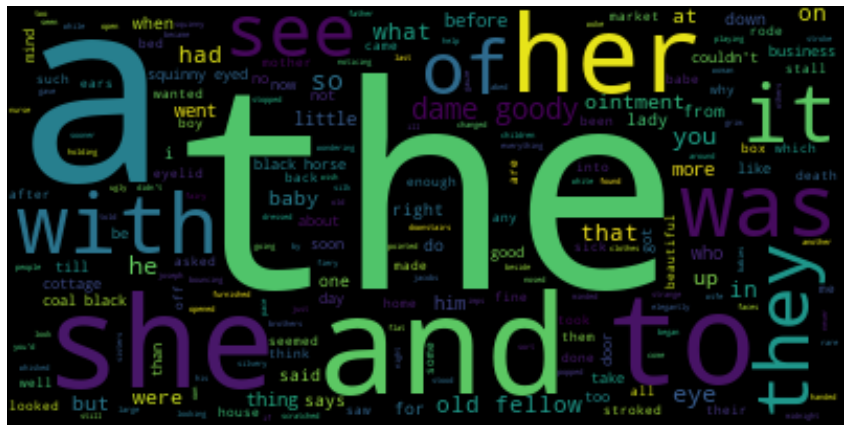

In [22]:
# Generate wordcloud
wc = wordcloud.WordCloud(stopwords=[]).generate(text)

# Showing wordcloud
plt.figure(figsize=(15, 15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

We are now going to use spacy and its ability to handle tokens automatically to extract different important features from the report and review how to process text with spacy.

You should dowload the lenguage to use. In our case english

!python -m spacy download en_core_web_sm

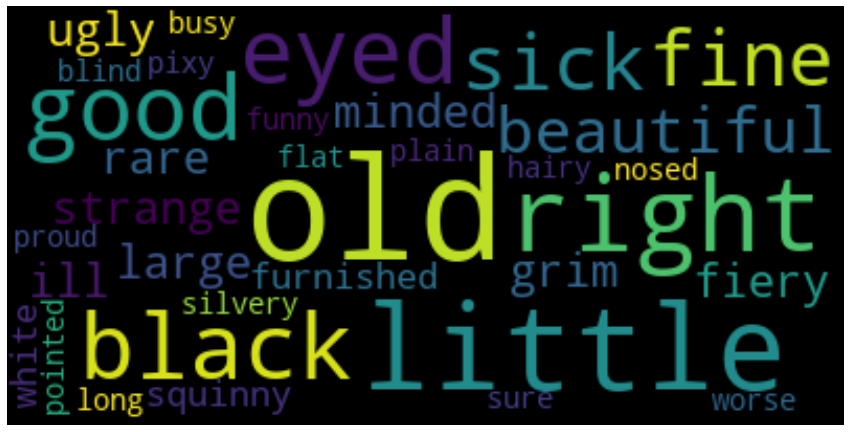

In [24]:
import spacy
nlp = spacy.load('en_core_web_sm')

text = '\n'.join(df_fairy_ointment_data.Lines.values)
doc = nlp(text)

# Generating a wordcloud with adjetives of the story
words = ' '.join(
    [ 
     token.norm_ for token in doc
     if token.is_alpha and not token.like_num and not token.is_stop and
        not token.is_currency and token.pos_ in ['ADJ']
    ]
)

# Generate wordcloud
wc = wordcloud.WordCloud().generate(words)

# Showing wordcloud
plt.figure(figsize=(15, 15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

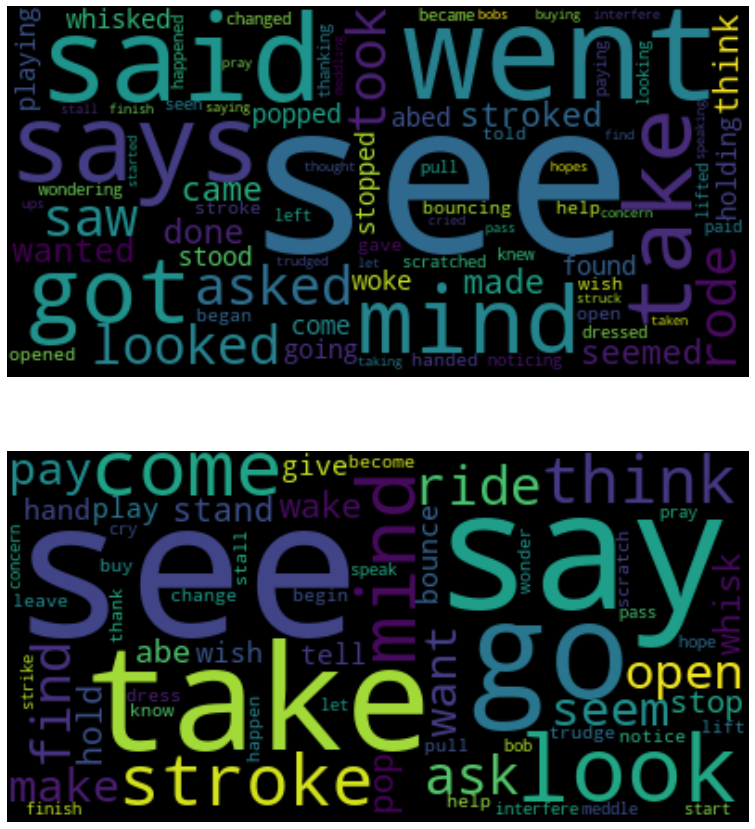

In [32]:
verb = ' '.join(
  [token.norm_ for token in doc if token.pos_ in ['VERB']]
)

verb_inf = ' '.join(
  [token.lemma_ for token in doc if token.pos_ in ['VERB']]
)

# Generate wordcloud
wc_verb = wordcloud.WordCloud().generate(verbos)
wc_verb_inf = wordcloud.WordCloud().generate(verbos_inf)

# Showing wordcloud
plt.figure(figsize=(15, 15))
plt.subplot(2,1,1)
plt.imshow(wc_verb, interpolation='bilinear')
plt.axis("off")
plt.subplot(2,1,2)
plt.imshow(wc_verb_inf, interpolation='bilinear')
plt.axis("off")
plt.show()

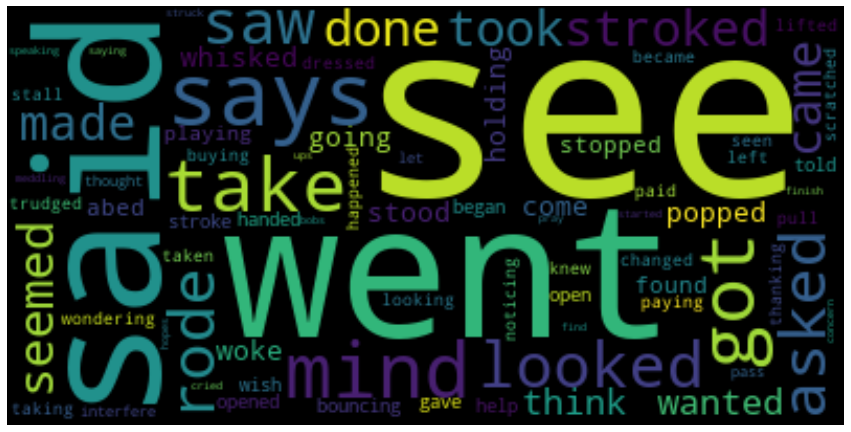

In [25]:
# Generating a wordcloud with verbs of the story
verbs = ' '.join(
  [token.norm_ for token in doc if token.pos_ in ['VERB']]
)

# Generate wordcloud
wc = wordcloud.WordCloud().generate(verbs)

# Showing wordcloud
plt.figure(figsize=(15, 15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

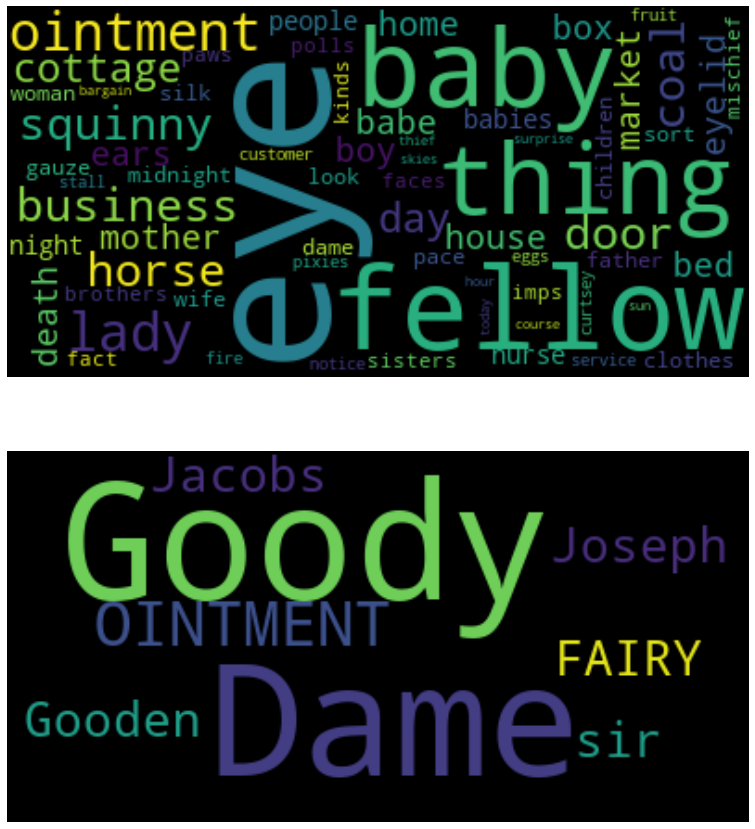

In [33]:
# Generating a wordcloud with noun of the story
noun = ' '.join(
    [ 
     token.norm_ for token in doc
     if token.is_alpha and not token.like_num and not token.is_stop and
        not token.is_currency and token.pos_ in ['NOUN']
    ]
)

# Generating a wordcloud with proper noun of the story
proper_noun = ' '.join(
    [ 
     token.text for token in doc
     if token.is_alpha and not token.like_num and not token.is_stop and
        not token.is_currency and token.pos_ in ['PROPN'] 
    ]
)

# Generate wordcloud
wc_noun = wordcloud.WordCloud().generate(noun)
wc_propn = wordcloud.WordCloud().generate(proper_noun)

# Showing wordcloud
plt.figure(figsize=(15, 15))
plt.subplot(2,1,1)
plt.imshow(wc_noun, interpolation='bilinear')
plt.axis("off")
plt.subplot(2,1,2)
plt.imshow(wc_propn, interpolation='bilinear')
plt.axis("off")
plt.show()

What about if you want the word cloud with a specific form

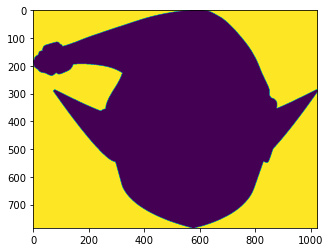

In [29]:
import urllib.request
import numpy as np
from PIL import Image

fairy_img = "./img/fairy.png"

mask =  np.array(Image.open(fairy_img))[:,:,0]
mask[mask != 0] = 10
mask[mask == 0] = 255
plt.imshow(mask)

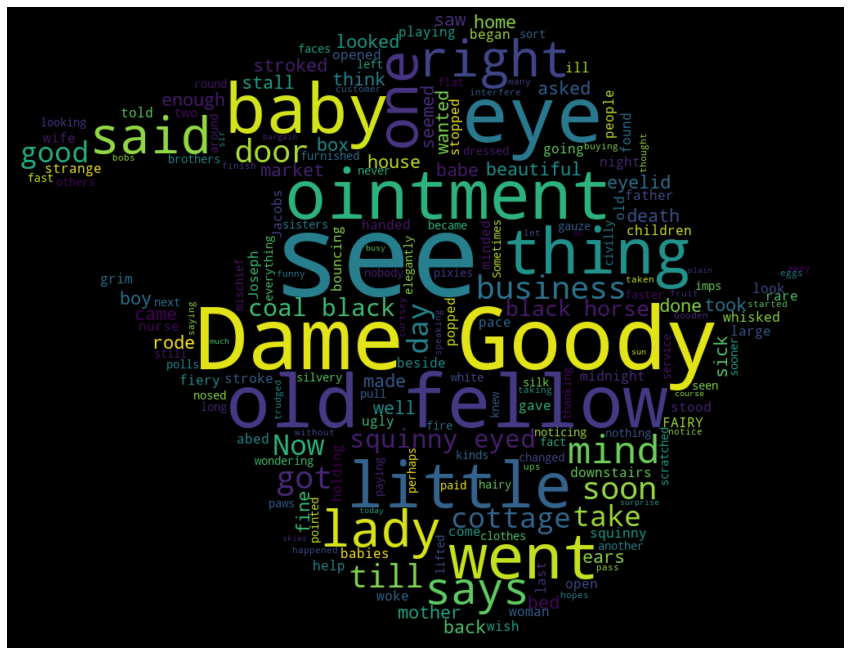

In [31]:
# Generate wordcloud
wc = wordcloud.WordCloud(mask=mask, background_color="black", contour_color='blue').generate(text)

# Showing wordcloud
plt.figure(figsize=(15, 15))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()